In [21]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [5]:
train_df=pd.read_csv('E:/Projects/Santander Value Prediction/train.csv')
test_df = pd.read_csv('E:/Projects/Santander Value Prediction//test.csv')

In [6]:
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [7]:
test_df.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
X_train = train_df.drop(["ID", "target"], axis=1)
y_train = train_df["target"]  # take log to train target

X_test = test_df.drop(["ID"], axis=1)

In [39]:
print("Train set size: {}".format(X_train.shape))
print("Test set size: {}".format(X_test.shape))

Train set size: (4459, 4991)
Test set size: (49342, 4991)


In [40]:
missing_values_count=X_train.isnull().sum()
total_missing=missing_values_count.sum()
total_missing

0

###  Remove Constant Features


In [9]:
colsToRemove = []
for col in X_train.columns:
    if X_train[col].std() == 0: 
        colsToRemove.append(col)
        
# remove constant columns in the training set
X_train.drop(colsToRemove, axis=1, inplace=True)

# remove constant columns in the test set
X_test.drop(colsToRemove, axis=1, inplace=True) 

print("Removed `{}` Constant Columns\n".format(len(colsToRemove)))
print(colsToRemove)

Removed `256` Constant Columns

['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a7

In [42]:
print("Train set size: {}".format(X_train.shape))
print("Test set size: {}".format(X_test.shape))

Train set size: (4459, 4735)
Test set size: (49342, 4735)


### Creating training dataset and test dataset

In [10]:
from sklearn.cross_validation import train_test_split

train, test, target_train, target_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

e:\python\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Random Forrest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(train,target_train);
print(rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [26]:
predictions = rf.predict(test)
print("R2 score is {}".format(metrics.r2_score(target_test,predictions)))
print("Explained Variance is {}".format(metrics.explained_variance_score(target_test,predictions)))

R2 score is 0.1665044889048607
Explained Variance is 0.1671338965582566


### Stardardize features
Standardize features by removing the mean and scaling to unit variance

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(train)
test_features = scaler.transform(test)

###  Use PCA to transform data (train and test) and get princial components¶

In [12]:
from sklearn.decomposition import PCA
pca=PCA(.85)
# choose the minimum number of principal components 95% of the variance is retained
pca.fit(train_features)
#only fitting PCA on the training set

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.n_components_ 

864

In [14]:
# Apply the transform to both data sets
train_result=pca.fit_transform(train_features)
test_result=pca.transform(test_features)

In [50]:
train_result.shape,test_result.shape

((3567, 864), (892, 864))

### Viz: plot proportion of variance explained with top principal components

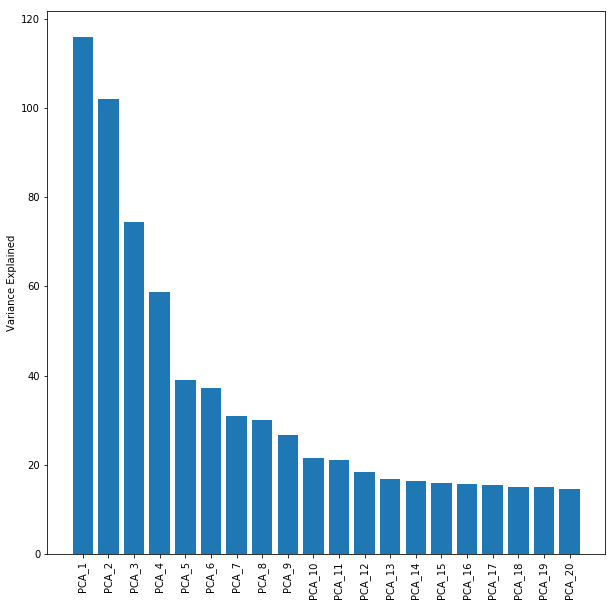

In [51]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize=(10, 10))
plt.bar(pca_range,
        pca.explained_variance_[:n_col_to_display],
        align='center')
xticks = plt.xticks(pca_range,
                    pca_names,
                    rotation=90)
plt.ylabel('Variance Explained')
plt.show()

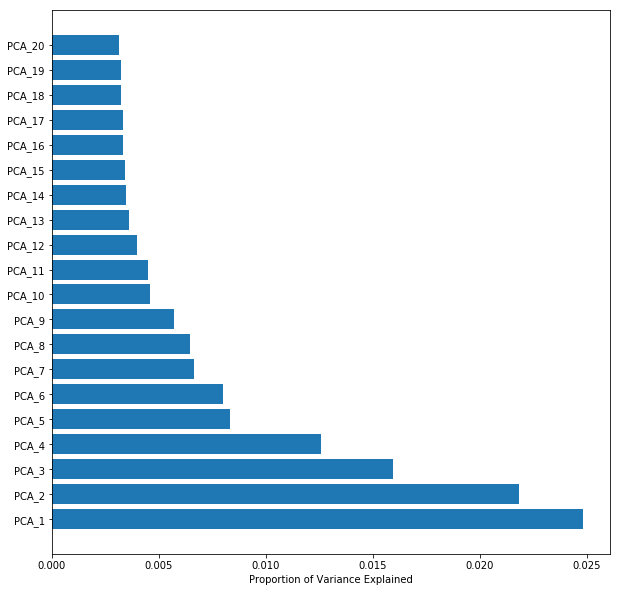

In [33]:
n_col_to_display = 20

pca_range = np.arange(n_col_to_display) + 1
pca_names = ['PCA_%s' % i for i in pca_range]

plt.figure(figsize=(10, 10))
plt.barh(pca_range, pca.explained_variance_ratio_[:n_col_to_display], align='center')
xticks = plt.yticks(pca_range, pca_names)
plt.xlabel('Proportion of Variance Explained')

plt.show()

## Random Forrest Regression Model

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(train_result, target_train);


In [29]:
print(rf)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)


In [30]:
predictions = rf.predict(test_result)
#errors = np.sqrt(np.mean(np.power(log(predictions+1) -log(target_test+1),2)))
## RMSLE
print("R2 score is {}".format(metrics.r2_score(predictions,target_test)))
print("Explained Variance is {}".format(metrics.explained_variance_score(predictions,target_test)))

R2 score is -0.997446287109838
Explained Variance is -0.9038772877348387


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

## XGBoost Model